# DefocusTrackerAI: A Generalized Framework for the Automatic Detection of Defocused Particle Images

In this nootebook, we will explore the automatic detection of defocused particle images using machine learning based object detectors -  YOLOv9-m. In particular, how to initiate the python class, process the images and visualize the results.

## Outline:
- [1. Notebook preparation](#1)
  - 1.1 Setup Google Drive (if needed)
  - 1.2 Setup working directory
  - 1.3 Install requirements
- [2. DefocusTrackerAI](#2)
  - [2.1 Initiate DefocusTrackerAI](#2.1)
  - [2.2 Process image set with YOLOv7](#2.2)
  - [2.3 Visualize the detection and tracking results on the image set](#2.3)


<a name="1"></a>

## 1 Notebook preparation

First, let's run the following cells to setup the Google Drive (if needed), the working directory and install the requirements for the DefocusTrackerAI toolbox.

In [2]:
!git clone https://oauth2:@gitlab.com/goncalo.coutinho/defocustrackerAI-main.git

Cloning into 'defocustrackerAI-main'...
remote: Enumerating objects: 424, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (391/391), done.
remote: Total 424 (delta 131), reused 0 (delta 0), pack-reused 27 (from 1)
Receiving objects: 100% (424/424), 235.44 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Error downloading object: yolov9_m_dptai.pt (853cf6f): Smudge error: Error downloading yolov9_m_dptai.pt (853cf6f4cf2898c0d42cd3e3292b20ea3a3e327e17d9c82e987e2c1dd9bbbcd4): batch response: Authentication required: Authorization error: https://oauth2:@gitlab.com/goncalo.coutinho/defocustrackerAI-main.git/info/lfs/objects/batch
Check that you have proper access to the repository

Errors logged to /content/defocustrackerAI-main/.git/lfs/logs/20250314T111909.10344264.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: yolov9_m_dptai.pt: smudge filter lfs failed
You can inspect what 

In [11]:
cd /content/defocustrackerAI-main

/content/defocustrackerAI-main


In [12]:
import sys
sys.path.append('/content/defocustrackerAI-main/yolov9_main')

In [13]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 203.4 MB/s eta 0:00:01^C


<a name="2"></a>

## 2 DefocusTrackerAI

The `DefocusTrackerAI` is a python class that contains the methods to automatically detect defocus particle images and track them in 2D using the SORT algorithm. To start using the toolbox, first we need to import it as shown below: `from my_utils.DefocusTrackerAI import DefocusTrackerAI`.

In [14]:
# Import python class: DefocusTrackerAI
from my_utils.DefocusTrackerAI import DefocusTrackerAI

KeyboardInterrupt: 

<a name="2.1"></a>

### 2.1 Initiate DefocusTrackerAI

Once it is imported, we can initiate the `DefocusTrackerAI` providing the directory containing the images to be processed, as shown in the next cell. The processing can be done using the `detect_yolov7` method. Some guidelines follow:  

1. `mytracker` will be an object from the `DefocusTrackerAI` class, which contains its own image set, provided by the image directory, and can call the methos defined in the class, such as `detect_yolov7`.  

2. `detect_yolov7` is an implementation of the object detector YOLOv7 and by default it is initiated with YOLOv7-m model with pre-trained weights on a synthetic dataset containing defocused particle images. As hyper-parameters, it takesm the number of frames that we want to process `N_frames`, the confidence threshold `conf_thres`, the image size `imgsz` and a optional bool type hyper-parameter to enable or disable tracking `enable_tracking`.

3. During processing, a folder named `runs` will be created in the working directory where one can find, within detection and the weights version, a folder with the processed data. It will contain a `.txt` file containing the hyperparameters, a `.csv` file with the detections (fr, id, X, Y, W, H, Cm) and also a folder with `.txt` files containing the detections for each individual frame.

4. If tracking is enabled with `enable_tracking = True`, the `.csv` file containing the tracking data can be found in `runs/tracking`. It uses the same format, however with the `id` corresponding to each individual track.

_**NOTE:** Users can also use one of the other available models in our implementation: YOLOv7-s (lightweight version) and YOLOv7-c (large version) or
provide their own pre-trained weights for one of these models: YOLOv7 -s, -m or -c._

In [9]:
# Directory containing the images to be processed
image_dir = './data-test/synthetic/synthetic_A_min_16px_NS_0100'
# Initiate DefocusTrackerAI
mytracker = DefocusTrackerAI(image_dir)

DefocusTrackerAI-1.0.0 🔍 2025-03-14 Python-3.11.11 torch-2.5.1+cu124 CUDA:No CUDA-enabled GPU found
Working directory: /content/defocustrackerAI-main


<a name="2.2"></a>

### 2.2 Process images with YOLOv9

Now that we are all set, we can process a few frames for testing and enable tracking with `enable_tracking = True`.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Updated git hooks.
Git LFS initialized.


In [11]:
!wget "https://gitlab.com/goncalo.coutinho/defocustrackerAI-main/-/raw/main/yolov9_m_dpt.pt" -O yolov9_m_dpt.pt

--2025-03-14 11:00:09--  https://gitlab.com/goncalo.coutinho/defocustrackerAI-main/-/raw/main/yolov9_m_dpt.pt
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-03-14 11:00:09 ERROR 404: Not Found.



In [7]:
!ls -lh my_models/detect/yolov9-m/yolov9_m_dpt.pt

ls: cannot access 'my_models/detect/yolov9-m/yolov9_m_dpt.pt': No such file or directory


In [19]:
!rm -f my_models/detect/yolov9-m/yolov9_m_dpt.pt
!wget "https://gitlab.com/goncalo.coutinho/defocustrackerAI-main/-/raw/main/my_models/detect/yolov9-m/yolov9_m_dpt.pt" -O my_models/detect/yolov9-m/yolov9_m_dpt.pt

--2025-03-14 09:47:38--  https://gitlab.com/goncalo.coutinho/defocustrackerAI-main/-/raw/main/my_models/detect/yolov9-m/yolov9_m_dpt.pt
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128 [application/octet-stream]
Saving to: ‘my_models/detect/yolov9-m/yolov9_m_dpt.pt’

my_models/detect/yo 100%[===================>]     128  --.-KB/s    in 0s      

2025-03-14 09:47:39 (155 MB/s) - ‘my_models/detect/yolov9-m/yolov9_m_dpt.pt’ saved [128/128]



In [13]:
weights_path = "yolov9_m_dpt.pt"
import os
import torch
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"Model weights not found at {weights_path}")

# Load model
model = torch.load(weights_path, map_location="cpu")

EOFError: Ran out of input

In [13]:
my_detections = mytracker.detect_yolov9(weights = './my_models/detect/yolov9-m/yolov9_m_dpt.pt',
                                        N_frames = 5,
                                        conf_thres = 0.5,
                                        iou_thres = 0.5,

                                        imgsz = 1024
                                    )

YOLO 🚀 2025-3-14 Python-3.11.11 torch-2.5.1+cu124 CPU



UnpicklingError: invalid load key, 'v'.

<a name="2.3"></a>

### 2.3 Visualize the detection and tracking results on the image set


Amazing! If you reached this far you were able to process your images using `DefocusTrackerAI`.

Now, to visualize the data, we included the `imageset_viewer` method which takes a `pandas dataframe` (`my_detections`) as input and the number of frames to be showed. In each frame, a bounding box will be drawed if the particle was detected. It will be red if tracking was not enabled, or it will have different colors based on the results from the SORT tracking; the number of track will also be displayed.

_**Note**: If you are not happy with the detection rate perhaps lowering the confidence threshold `conf_thres` will improve the results._

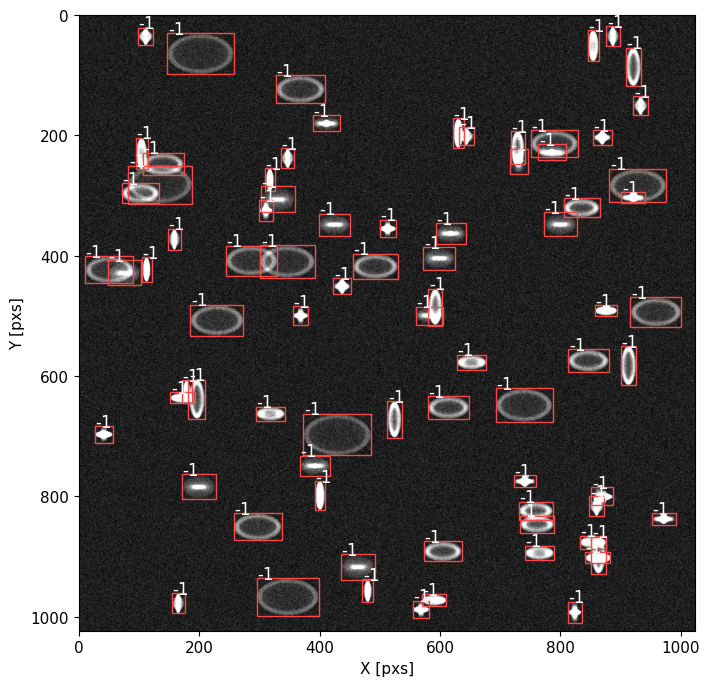

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

IntSlider(value=750, description='Brightness', max=1000, min=1)

In [ ]:
%matplotlib inline
mytracker.imageset_viewer(my_detections,
                          n_frames = 20
                          )